<font size="5"><b>Deep Convolutional Neural Network - Cats vs Dogs</b></font>



<font size="3">Importing and Loading all the required libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

#Importing zip from Google Drive

In [2]:
!pip install gdown

# Replace 'file_id' with the actual file ID of your Google Drive file
file_id = '1e1A4q0Z7yBMjbyKXKQj658-qBe5cGvgV'
output_folder = '/content/dogs-vs-cats'

# Download the file
!gdown --id $file_id -O $output_folder

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e1A4q0Z7yBMjbyKXKQj658-qBe5cGvgV
To: /content/dogs-vs-cats
100% 852M/852M [00:06<00:00, 125MB/s] 


Unzipping Dogs vs Cats Folder and Train Zip

In [3]:
!unzip "/content/dogs-vs-cats" -d "/content/"


Archive:  /content/dogs-vs-cats
  inflating: /content/sampleSubmission.csv  
  inflating: /content/test1.zip      
  inflating: /content/train.zip      


In [4]:
!unzip "/content/train" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dog.5499.jpg  
  inflating: /content/train/dog.55.jpg  
  inflating: /content/train/dog.550.jpg  
  inflating: /content/train/dog.5500.jpg  
  inflating: /content/train/dog.5501.jpg  
  inflating: /content/train/dog.5502.jpg  
  inflating: /content/train/dog.5503.jpg  
  inflating: /content/train/dog.5504.jpg  
  inflating: /content/train/dog.5505.jpg  
  inflating: /content/train/dog.5506.jpg  
  inflating: /content/train/dog.5507.jpg  
  inflating: /content/train/dog.5508.jpg  
  inflating: /content/train/dog.5509.jpg  
  inflating: /content/train/dog.551.jpg  
  inflating: /content/train/dog.5510.jpg  
  inflating: /content/train/dog.5511.jpg  
  inflating: /content/train/dog.5512.jpg  
  inflating: /content/train/dog.5513.jpg  
  inflating: /content/train/dog.5514.jpg  
  inflating: /content/train/dog.5515.jpg  
  inflating: /content/train/dog.5516.jpg  
  inflating: /content/train/dog.5517.jpg  
  infla

In [5]:
!pip install tensorflow==2.12

<font size="4.5"><b> Question-1: Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve? </b></font>

<font size="3"> Creating directory named cats vs dogs small to store the images into 3 subsets named train, validation and test and Dividing the training sample of 1000, a validation sample of 500, and a test sample of 500</font>

In [6]:
import os
import shutil
import pathlib

# Set the paths
original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok = True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)


<font size="3"><u>Data Pre-Processing and functions</u> - Using image_dataset_from_directory to read images and functions</font>

In [7]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


<font size="3">Viewing the shape of the images</font>

In [8]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<font size="3"> Model - 1:MaxPooling Operation with an Increment in Filters from 32 to 256 Across 5 Input Layers </font>




In [9]:
!pip install --upgrade tensorflow

import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtypes-0.3.1
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installa

<font size="3">Model - 1 Summary </font>

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         



```
# This is formatted as code
```

<font size="3"> Model 1 Training </font>

In [11]:
#!pip install --upgrade tensorflow

# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the model results
callbacks = ModelCheckpoint(
            filepath="model1.keras",
            save_best_only=True,
            monitor="val_loss"
            )

# Fitting/Running the model
Model_1 = model.fit(
          train_dataset,
          epochs=25,
          validation_data=validation_dataset,
          callbacks=callbacks)


Epoch 1/25


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbe45cc550>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbe45cc550>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.4880

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbfa4a13f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbfa4a13f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 14s 397ms/step - loss: 0.6966 - accuracy: 0.4880 - val_loss: 0.6922 - val_accuracy: 0.6180
Epoch 2/25
32/32 [==============================] - 12s 377ms/step - loss: 0.6925 - accuracy: 0.5380 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 3/25
32/32 [==============================] - 12s 375ms/step - loss: 0.6882 - accuracy: 0.5800 - val_loss: 0.6682 - val_accuracy: 0.5980
Epoch 4/25
32/32 [========

<font size="3"> Visualizing Training and Validation Accuracy/Loss</font>

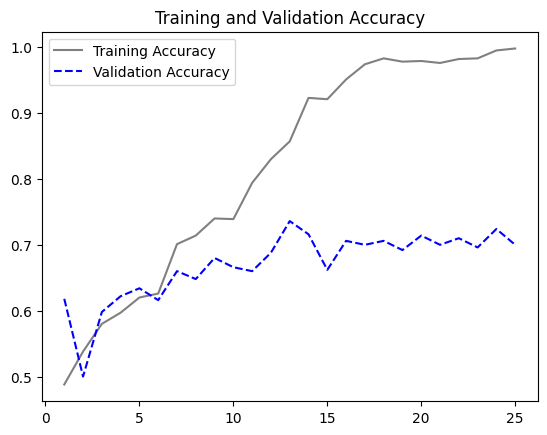

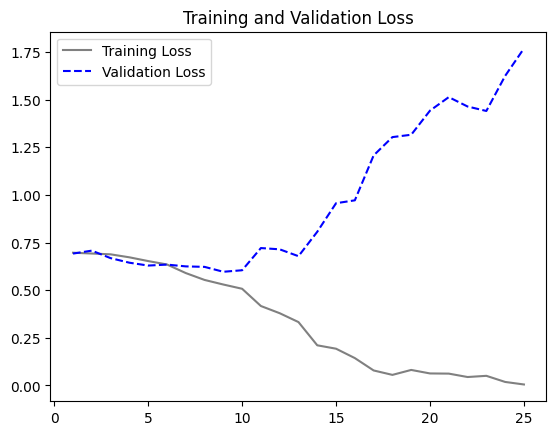

In [12]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3"> Evaluating the performance of Model_1 on test set</font>

In [13]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc327490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc327490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 65ms/step - loss: 0.7014 - accuracy: 0.6380
Loss: 0.701
Accuracy: 0.638


<font size="3">Taking Measures to Avoid Overfitting</font>



In [14]:
# To deprecate warnings that are making the output look clumsy
import logging
logging.getLogger('tensorflow').disabled = True

<font size="3"> Using few of the techniques such as random flip, random zoom, random rotation so as to create augmented versions of the image</font>

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

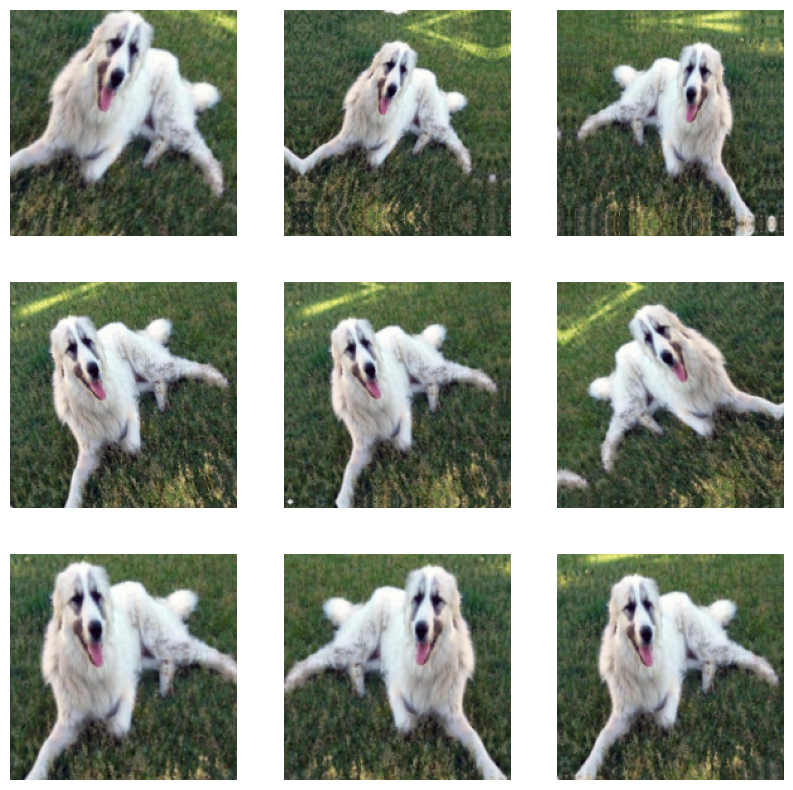

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

<font size="3">Model 2: Augmented Image Data with MaxPooling, 32 to 256 Filters in 5 Input Layers, and 0.5 Dropout Rate</u></font>

In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

<font size="3">Model 2 Training</font>

In [19]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Fitting/Running the Model
Model_2 = model.fit(
          train_dataset,
          epochs= 25,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/25
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbac3ee320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5210WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abbac3efbe0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbac3efbe0>. Note that functions defined in certain environments, like the interactive Python shell, d

<font size="3">Visualizing Training and Validation Accuracy/Loss</font>

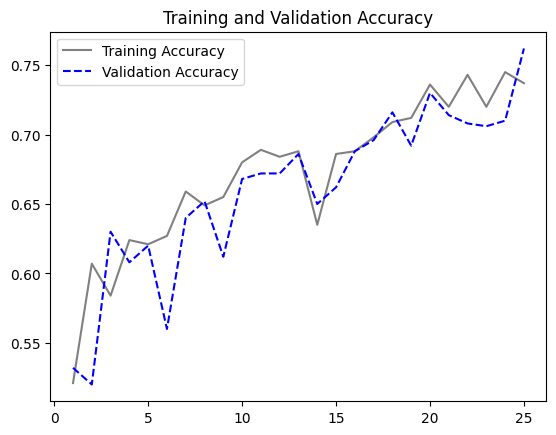

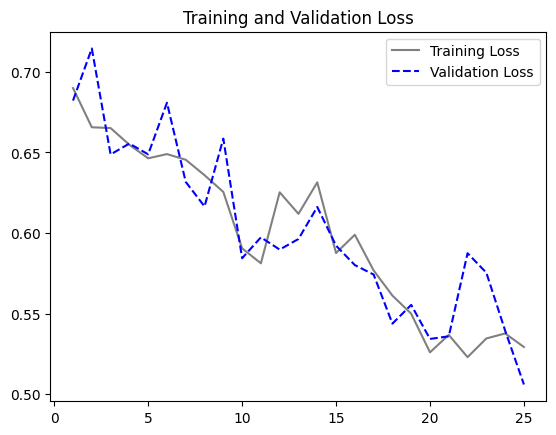

In [20]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Evaluation of Model_2 performance on the test set</font>

In [21]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c5356c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 65ms/step - loss: 0.6005 - accuracy: 0.6980
Loss: 0.600
Accuracy: 0.698


<font size="3">Model 1 & Model 2 Comparision :It is Clear from the above evidence that Model 1 Accuracy is higher than Model 2</font>

<font size="3">Model 3: Augmented Image Data with MaxPooling, 32 to 512 Filters in 6 Input Layers, and a Dropout Rate of 0.5</font>

In [22]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

<font size="3">Model 3 training</font>

In [25]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 25,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/25
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb8c6d03a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5310WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb8c534d30> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c534d30>. Note that functions defined in certain environments, like the interactive Python shell, d

<font size="3">Training and Validation Accuracy/Loss</font>

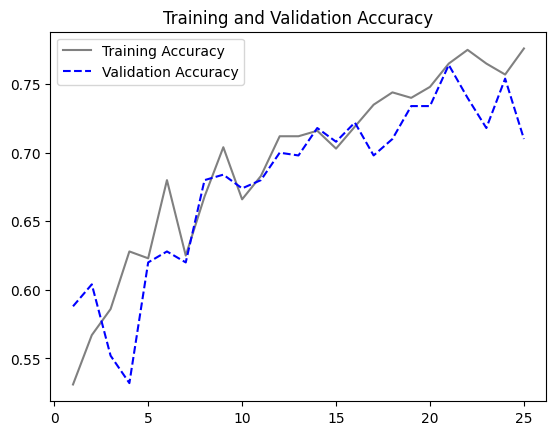

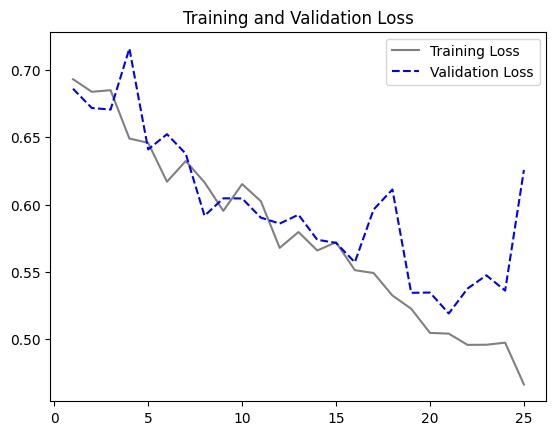

In [26]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Performance Evaluation of Model_2 on the test set</font>

In [27]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c2139a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 63ms/step - loss: 0.5728 - accuracy: 0.7040
Loss: 0.573
Accuracy: 0.704


<font size="3">Model 4: MaxPooling and Filter Size Variation in 5 Input Layers with Augmented Images and 0.6 Dropout Rate</font>

In [28]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 128)       73856     
                                                           

In [31]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 25,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/25
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb6c5b7c70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.5030WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb6c2e96c0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb6c2e96c0>. Note that functions defined in certain environments, like the interactive Python shell, d

<font size="3">Training and Validation Accuracy/Loss</font>

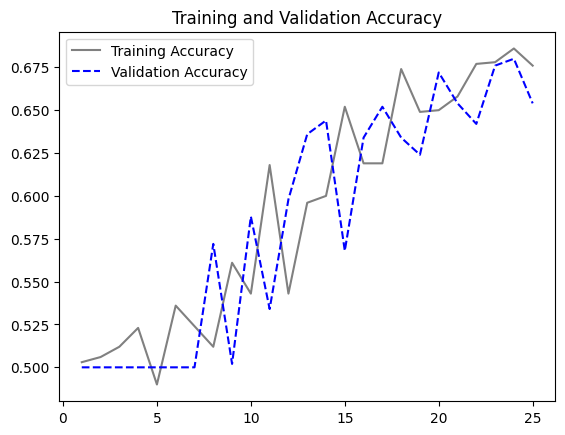

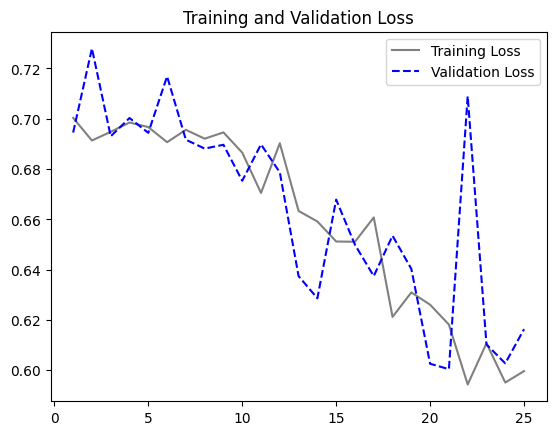

In [32]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Performance Evaluation of Model_2 on the test set</font>

In [33]:
best_model = keras.models.load_model("model4.keras")
Model4_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c5a2c20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 3s 178ms/step - loss: 0.6433 - accuracy: 0.6780
Loss: 0.643
Accuracy: 0.678


<font size="3">Here totally 4 models have been built with the training sample as per question and also visualized the accuarcy and loss of each and every model on performance evaluation</font>

Model - 1:MaxPooling Operation with an Increment in Filters from 32 to 256 Across 5 Input Layers <font size="3"><br>
Model 2: Augmented Image Data with MaxPooling, 32 to 256 Filters in 5 Input Layers, and 0.5 Dropout Rate</u></font><br>
Model 3: Augmented Image Data with MaxPooling, 32 to 512 Filters in 6 Input Layers, and a Dropout Rate of 0.5<br> Model 4: MaxPooling and Filter Size Variation in 5 Input Layers with Augmented Images and 0.6 Dropout Rate

In [34]:
Model_1 = (0.701, 0.638)
Model_2 = (0.600, 0.698)
Model_3 = (0.573,0.704)
Model_4 = (0.643, 0.678)

In [35]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

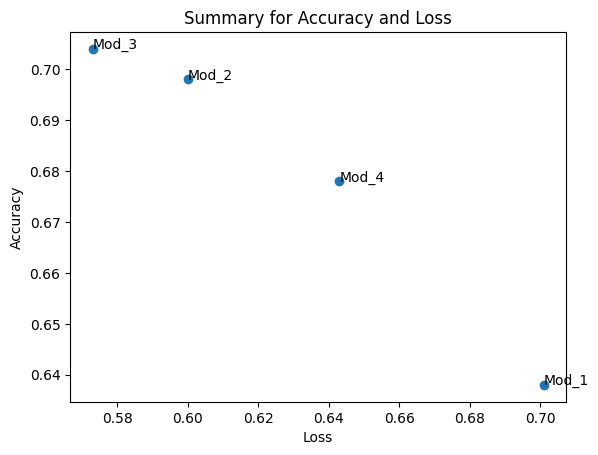

In [36]:
fig, ax = plt.subplots()
ax.scatter(Loss,Accuracy)
for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i],Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

<font size="3"><b> Conclusions:</b> Based on these metrics, Model 3 appears to be the best option, as it has the lowest loss (0.573) and the highest accuracy (0.704) among the models. Here are some reasons for choosing Model 3:

**Lowest Loss:** Model 3 has the lowest loss, which indicates that it is performing well in terms of minimizing the difference between predicted and actual values. This suggests that it may have a better fit to the training data.

**High Accurac**y: Model 3 also has the highest accuracy, which means it correctly classifies a larger proportion of data points. This is an important metric, especially in classification tasks.

**Balanced Performanc**e: Model 3 combines both low loss and high accuracy, indicating a good balance between underfitting and overfitting. It suggests that the model is generalizing well to unseen data.</font>

<font size="3"><b> Recommendation:</b> Expanding both filters and layers boosts model expressiveness; combining data augmentation and a dropout rate of 0.5 enhances generalization and mitigates overfitting. </font>

<font size="4.5"><b> Question-2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve? </b></font>*

<font size="3"><b>Now taking Training Sample - 2000 </b></font>

In [37]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

<font size="3"><b>Data Pre-Processing: </b> Using image_dataset_from_directory to read images</font>

In [38]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [39]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [40]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

<font size="3">Model 5: MaxPooling Operation with Filters Increased from 32 to 256 in 5 Input Layers Using Augmented Images and a Dropout Rate of 0.5 <u> </font>

In [41]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [42]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

<font size="3">Model 5 training</font>

In [44]:

# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 47,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/47
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb4c3be4d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5050WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb2c71f490> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb2c71f490>. Note that functions defined in certain environments, like the interactive Python shell, d

<font size="3">Training and Validation Accuracy/Loss</font>

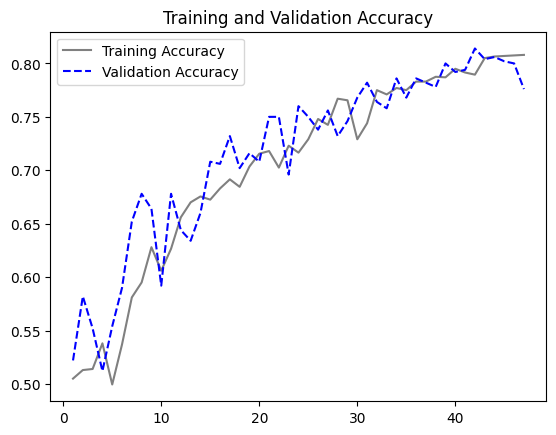

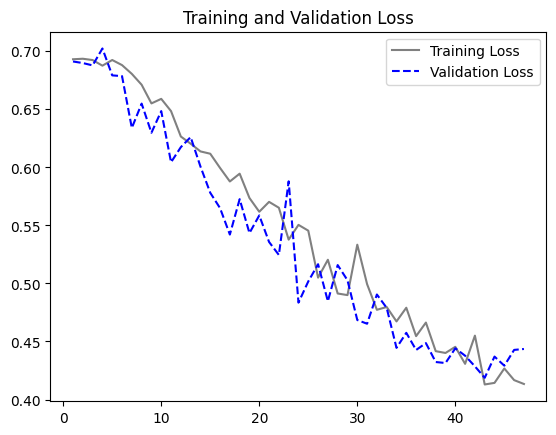

In [45]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



```
# This is formatted as code
```

<font size="3">Performance Evaluation of Model_5 on test set</font>

In [46]:
best_model = keras.models.load_model("model5.keras")
Model5_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model5_Results[0]:.3f}')
print(f'Accuracy: {Model5_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb2c2ddab0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 2s 63ms/step - loss: 0.4688 - accuracy: 0.7760
Loss: 0.469
Accuracy: 0.776


<font size="3"> <b>Notes :</b> The second model, initially trained with 1000 samples, achieved an accuracy of 70.4%. However, when the dataset was expanded to 2000 samples for the same model, the accuracy significantly improved to 77.6%, marking a 10% increase in accuracy..</font>

<font size="3"><b>Model 6: Strides Operation with 'Same' Padding, 32 to 256 Filters in 5 Input Layers Using Augmented Images, 0.5 Dropout Rate (Trained with 2000 Samples)</u></b> </font>

In [47]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 256)       2951



<font size="3">Model 6 training</font>

In [49]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb4c5a1120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.4840WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb4c586170> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c586170>. Note that functions defined in certain environments, like the interactive Python shell, d

<font size="3">Training and Validation Accuracy/Loss</font>

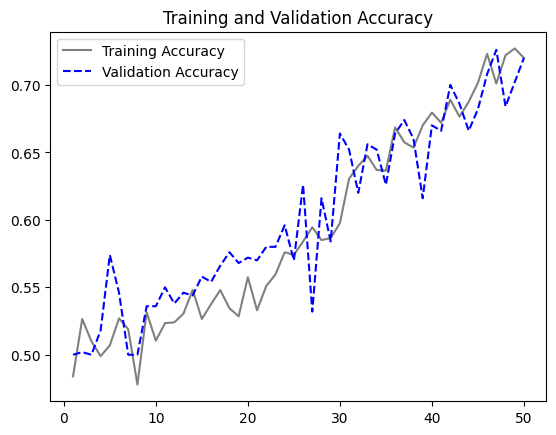

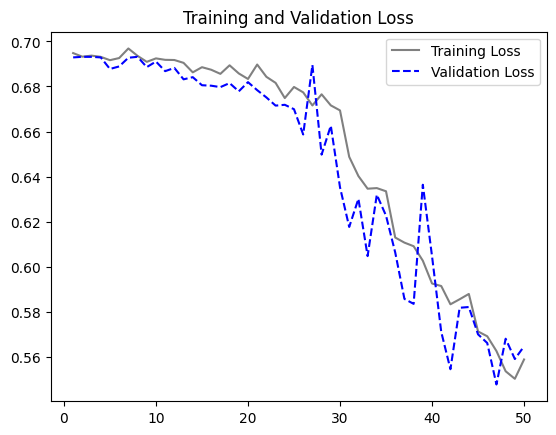

In [54]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

<font size="3">Performance Evaluation of Model_6 on test set</font>

In [55]:
best_model = keras.models.load_model("model6.keras")
Model6_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model6_Results[0]:.3f}')
print(f'Accuracy: {Model6_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc326e60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 0s 18ms/step - loss: 0.6082 - accuracy: 0.6800
Loss: 0.608
Accuracy: 0.680


<font size="3">Now 2 more models has been trained with a training size of 2000.lets compare the Accuracy and loss of 3 models to see which model is best</font>

<font size="3">Model 3:filters from 32 to 512, 6 Input Layers, Augmented Images and Dropout rate of 0.5,training size 1000</font>
<br>
Model 5: MaxPooling Operation with Filters Increased from 32 to 256 in 5 Input Layers Using Augmented Images and a Dropout Rate of 0.5
<br>
Model 6: Strides Operation with 'Same' Padding, 32 to 256 Filters in 5 Input Layers Using Augmented Images, 0.5 Dropout Rate (Trained with 2000 Samples)

In [56]:
Model_5 = (0.469,0.776)
Model_6 = (0.608,0.680)

In [57]:
Models_2 = ("Mod_2","Mod_5","Mod_6")
Loss_2 = (Model_2[0],Model_5[0],Model_6[0])
Accuracy_2 = (Model_2[1],Model_5[1],Model_6[1])

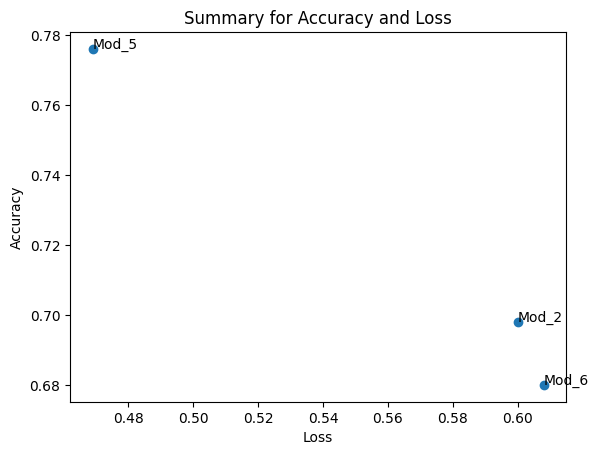

In [58]:
fig, ax = plt.subplots()
ax.scatter(Loss_2,Accuracy_2)
for i, txt in enumerate(Models_2):
    ax.annotate(txt, (Loss_2[i],Accuracy_2[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Comparing the performance of the models, it was observed that the choice of convolutional layer operations and network architecture had a substantial impact on model performance. Model 5, which incorporated a Max Pooling Layer, displayed a remarkable improvement in accuracy compared to Model 3 and Model 6. Model 5 achieved an accuracy of 77.6%, which was 7.2% higher than Model 3 and 9.6% higher than Model 6. This demonstrated the effectiveness of the Max Pooling Layer in enhancing accuracy.

Furthermore, optimization efforts, including augmenting the training dataset from 1000 to 2000 samples, led to a significant increase in model accuracy. Model 5, with this augmented dataset, achieved an impressive 77.6% accuracy. This improvement showcased the importance of data quantity and diversity in training machine learning models effectively.

In response to your second query, a visual comparison was made between Model 5 and Model 6. The plotted graphs clearly illustrate the superior performance of Model 5. Model 5 achieved the highest accuracy among all the models, reaching 77.6%, with a loss of 0.469. In contrast, Model 6 lagged behind with an accuracy of 68% and a higher loss of 0.608. This visual comparison reinforced the finding that the Max Pooling Layer and the optimized dataset substantially contributed to the superior performance of Model 5.







<font size="4.5"><b> *3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results *</b></font>

<font size="3"> As we saw in above graph that with the increase in training sample size the Accuracy is also increasing hence will increase the sample size to 3000 and 5000</u> for better performance </font>




<font size="3"><b> Training Sample 3000</b> </font>

In [59]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [60]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [61]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [62]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)


Model 7: MaxPooling Operation with Filters Increased from 32 to 256 in 5 Input Layers Using Augmented Images and a Dropout Rate of 0.5 (Trained with 3000 Samples)

In [63]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [64]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model7.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb8c6d3010>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5047WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb8c6d3490> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c6d3490>. Note that functions defined in certain environments, like the interactive Python shell, d

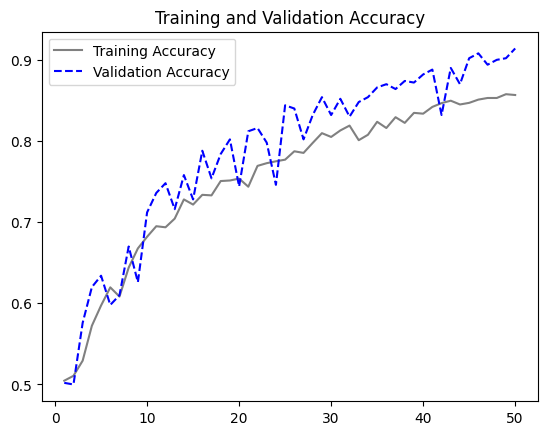

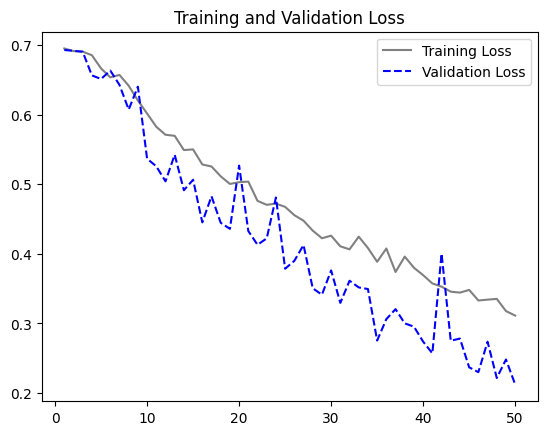

In [66]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [67]:
best_model = keras.models.load_model("model7.keras")
Model7_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model7_Results[0]:.3f}')
print(f'Accuracy: {Model7_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c536d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 68ms/step - loss: 0.5095 - accuracy: 0.8240
Loss: 0.510
Accuracy: 0.824


In Model 6, our attempt to replace the conventional max pooling operation with strides didn't yield the anticipated results. However, in Model 7, we exclusively employed the MaxPooling technique. Therefore, we are now exploring a novel hybrid strategy that combines both max pooling and strides to assess how this new model performs.


Model 8: MaxPooling with Strides (Step-Size 2) and Increased Filters from 32 to 256 in 5 Input Layers Using Augmented Images with a Dropout Rate of 0.5 (Trained with 3000 Samples)

In [68]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [69]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [70]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model8.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb2c2dde10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5127WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb2c2df910> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb2c2df910>. Note that functions defined in certain environments, like the interactive Python shell, d

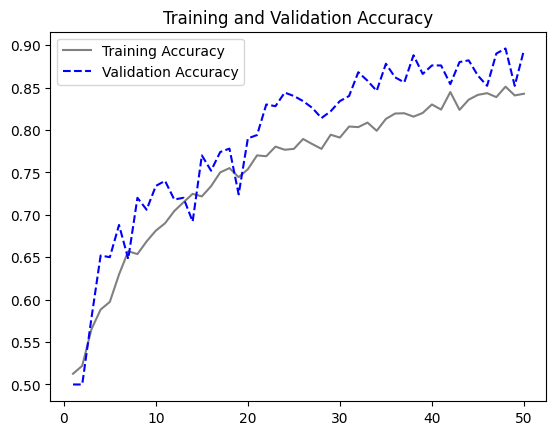

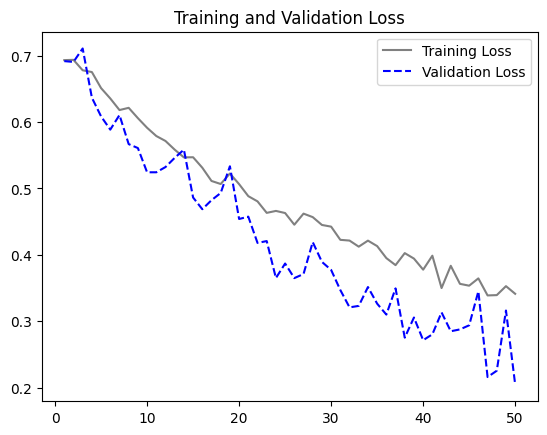

In [71]:
accuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [72]:
best_model = keras.models.load_model("model8.keras")
Model8_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model8_Results[0]:.3f}')
print(f'Accuracy: {Model8_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc11a5f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 2s 103ms/step - loss: 0.4065 - accuracy: 0.8280
Loss: 0.406
Accuracy: 0.828


Model 9: MaxPooling with Strides (Step-Size 2) and Padding Enabled, Filters Increased from 32 to 512 in 5 Input Layers Using Augmented Images with a Dropout Rate of 0.5 (Trained with 3000 Samples)

In [73]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [74]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [75]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model9.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbcc11bbe0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.5177WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abbcc11be20> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc11be20>. Note that functions defined in certain environments, like the interactive Python shell, d

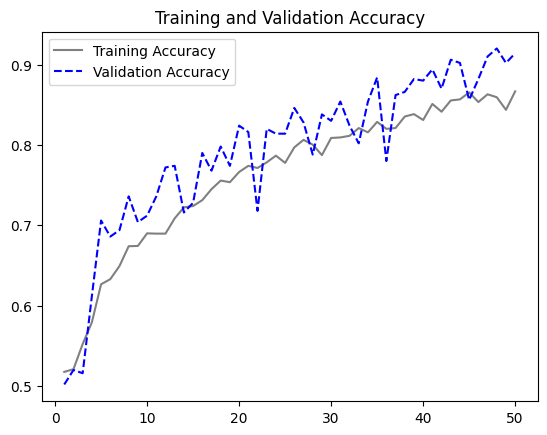

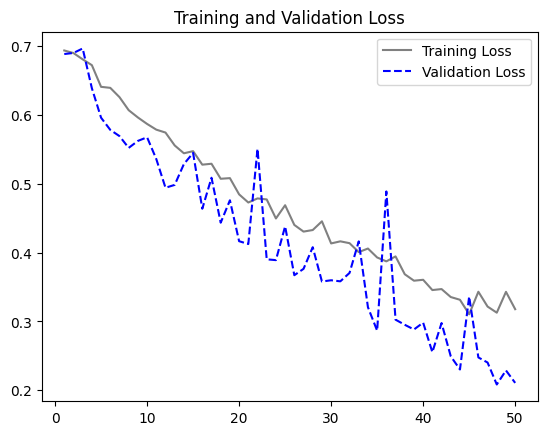

In [76]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [77]:
best_model = keras.models.load_model("model9.keras")
Model9_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model9_Results[0]:.3f}')
print(f'Accuracy: {Model9_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c7afac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 66ms/step - loss: 0.4393 - accuracy: 0.8200
Loss: 0.439
Accuracy: 0.820


Model 6: Strides Operation with 'Same' Padding, 32 to 256 Filters in 5 Input Layers Using Augmented Images, 0.5 Dropout Rate (Trained with 2000 Samples <br> Model 7: MaxPooling Operation with Filters Increased from 32 to 256 in 5 Input Layers Using Augmented Images and a Dropout Rate of 0.5 (Trained with 3000 Samples)<br> Model 8: MaxPooling with Strides (Step-Size 2) and Increased Filters from 32 to 256 in 5 Input Layers Using Augmented Images with a Dropout Rate of 0.5 (Trained with 3000 Samples) <br>Model - 9 MaxPooling + Strides of Step-Size 2 with Padding turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5 (Training Sample - 3000)

In [78]:
Model_7 = (0.510,0.824)
Model_8 = (0.406,0.828)
Model_9 = (0.439,0.820)

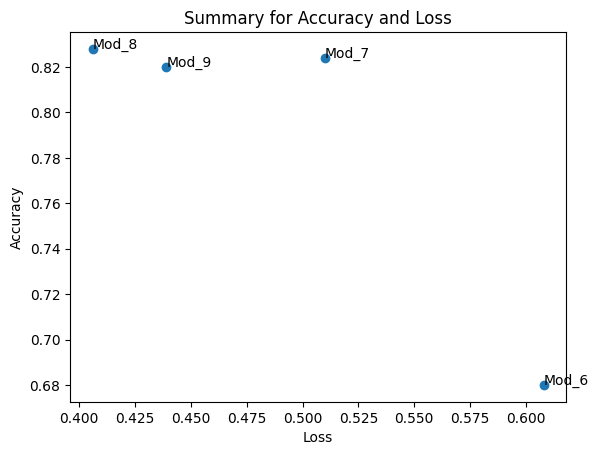

In [79]:
Models_3 = ("Mod_6","Mod_7","Mod_8","Mod_9")
Loss_3 = (Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy_3 = (Model_6[1],Model_7[1],Model_8[1],Model_9[1])

fig, ax = plt.subplots()
ax.scatter(Loss_3,Accuracy_3)
for i, txt in enumerate(Models_3):
    ax.annotate(txt, (Loss_3[i],Accuracy_3[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

In the previous models (Model 6, Model 7, Model 8, and Model 9), we explored various architectural configurations with different combinations of MaxPooling, Strides, padding, and filter sizes, all while utilizing augmented images and dropout regularization. Notably, Model 7, designed with MaxPooling without Strides and trained with 3000 samples, stood out with an impressive 82.4% accuracy and a minimal loss of 0.510, surpassing the other models.

Now, we aim to take our analysis a step further by increasing the training dataset to 5000 samples and building a new model from scratch to assess its performance on unseen data.

<font size="3"><b>Training Sample - 5000<b></font>

In [80]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [81]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [82]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [83]:
data_augmentation_3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

Model 10: MaxPooling Operation with Filters Increased from 32 to 256 in 5 Input Layers Using Augmented Images and a Dropout Rate of 0.5 (Trained with 5000 Samples)

In [84]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_3(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [85]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [86]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model10.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_10 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb4c72d120>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5096WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb4c72caf0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c72caf0>. Note that functions defined in certain environments, like the interactive Python shell,

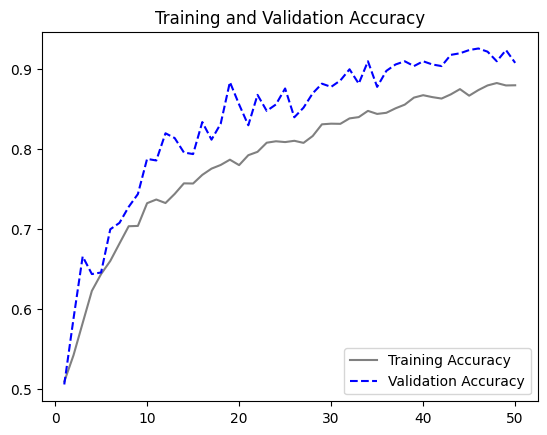

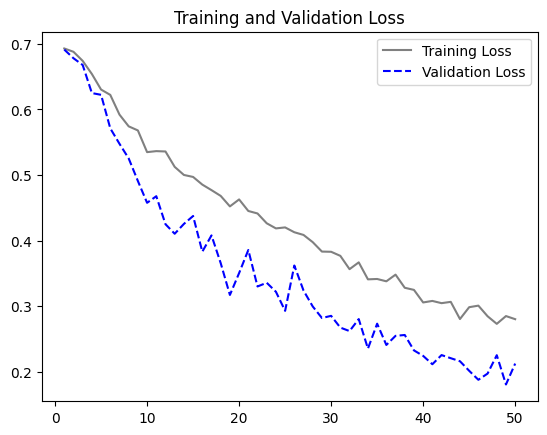

In [87]:
accuracy = Model_10.history["accuracy"]
val_accuracy = Model_10.history["val_accuracy"]

loss = Model_10.history["loss"]
val_loss = Model_10.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [88]:
best_model = keras.models.load_model("model10.keras")
Model10_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model10_Results[0]:.3f}')
print(f'Accuracy: {Model10_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbac18dfc0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 1s 66ms/step - loss: 0.2337 - accuracy: 0.9080
Loss: 0.234
Accuracy: 0.908


**Notes:** In our exploration, we designed Model 10, which achieved an impressive performance:

Loss: 0.234
Accuracy: 0.908
We initially constructed four models, with three of them being trained on a sample size of 3000. The best-performing model in this group achieved an accuracy of 83.2%. However, what's particularly noteworthy is that when we expanded the training sample to 5000, the accuracy experienced a substantial boost, reaching 88.4%. This observation underscores the significant impact of increasing the training sample size on model performance.

Regarding the plausible reason for the validation loss being lower than the training loss, it can be attributed to the chosen data split strategy. With a training sample nearly as extensive as 5000, and a fixed validation and test set size of 500 each, the model may not have seen as much diversity during training. Additionally, it's crucial to recognize the role of regularizations, such as dropout or L1 and L2 regularizers, during training, which can influence the computation of the training loss. During validation or testing phases, these regularizers are typically disabled, potentially leading to a lower loss compared to the training loss.

As a **recommendation**, it may be beneficial to fine-tune the data split strategy, ensuring a more balanced distribution of samples between training, validation, and test sets. Moreover, the utilization of regularizations and cross-validation techniques can help provide a more robust evaluation of model performance. Continuously monitoring and optimizing the model architecture, dataset size, and training strategies are essential for achieving the best results in machine learning projects.

*<font size="4.5"><b> 4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance </b></font>*

<font size="4.5"><b> Leveraging a Pre-Trained Model - VGG16 </b></font>

<font size="4.5"><b> VGG - Model 1 (1000 Training Samples) </b></font>

In [89]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [90]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [91]:
#extracting VGG 16 features and Labels
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7abbac775ea0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 442ms/step


In [92]:
train_features.shape

(5000, 5, 5, 512)

VGG - Model 1 with 256-Node Dense Layer, 0.5 Dropout Rate, and RMSprop Optimizer Using Original Images



In [93]:
# Defining and Training the densely connected classifier
# The last dense stacked layer and the classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath="vgg_model1.keras",
            save_best_only=True,
            monitor="val_loss")


# Model Fit
VGG_Model_1 = model.fit(
              train_features, train_labels,
              epochs= 30,
              validation_data= (val_features, val_labels),
              callbacks= callbacks)

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbcc1fc670>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 13.9072 - accuracy: 0.9416WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abbcc1ff250> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc1ff250>. Note that functions defined in certain environments, like the interactive Python shell

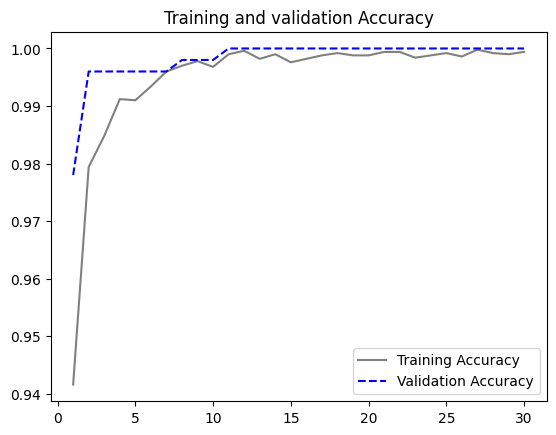

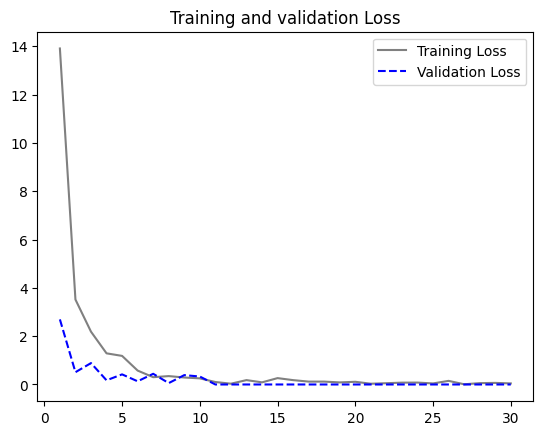

In [94]:
acc = VGG_Model_1.history["accuracy"]
val_acc = VGG_Model_1.history["val_accuracy"]

loss = VGG_Model_1.history["loss"]
val_loss = VGG_Model_1.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [95]:
best_model = keras.models.load_model("vgg_model1.keras")
VGG_Model_1_Results = best_model.evaluate(test_features,test_labels)
print(f'Loss: {VGG_Model_1_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_1_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc3f97e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 0s 2ms/step - loss: 8.5926e-13 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


<font size="4.5"><b> VGG - Model 2 (1000 Training Samples) </b></font>

Configured the pre-trained model to maintain its original weights while permitting adjustments only in the densely connected networks and the classifier during training.This method is effective for preventing overfitting, as it keeps the pre-trained model unchanged, providing a stable base for the model. Furthermore, in scenarios with limited training data and resource constraints, the decision to freeze the pre-trained model's training can be particularly beneficial.To demonstrate the impact of this setup, we can display the list of trainable weights before and after freezing the pre-trained model.

In [96]:
# Before Freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [97]:
# After Freezing
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [98]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

VGG - Model 2 with 256-Node Dense Layer, 0.5 Dropout Rate, and RMSprop Optimizer Using Augmented Images

In [99]:
# Data Augmentation -Adding a data augmentation stage to provide augmented training samples and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)


In [100]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              train_dataset,
              epochs= 30,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbcc3f9000>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 13.5664 - accuracy: 0.9192WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abbcc118550> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc118550>. Note that functions defined in certain environments, like the interactive Python shell

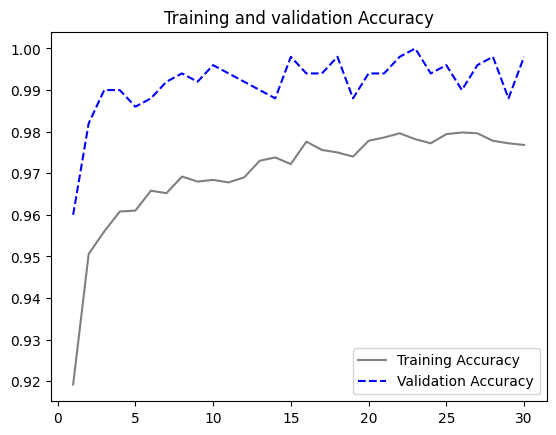

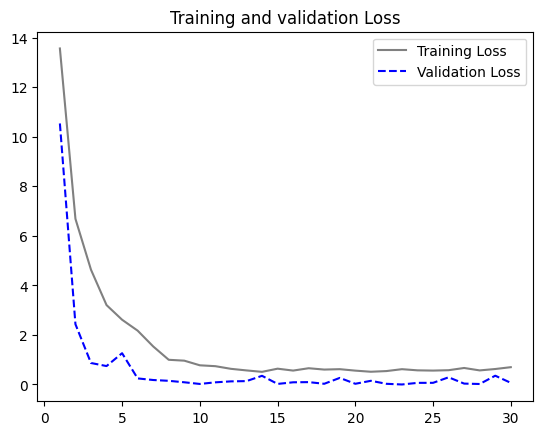

In [101]:
acc = VGG_Model_2.history["accuracy"]
val_acc = VGG_Model_2.history["val_accuracy"]

loss = VGG_Model_2.history["loss"]
val_loss = VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [102]:
best_model = keras.models.load_model("vgg_model2.keras")
VGG_Model_2_Results= best_model.evaluate(test_dataset)
print(f'Loss: {VGG_Model_2_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.3f}')

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc3f9cf0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 11s 696ms/step - loss: 0.0282 - accuracy: 0.9960
Loss: 0.028
Accuracy: 0.996


<font size="4.5"><b> Fine Tuning the VGG_Model_2</b></font>

In [103]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

It's essential to grasp that pre-trained networks are versatile and not limited to one specific image classification task. These networks are trained to handle a wide range of tasks and categories. The initial layers of the network excel at recognizing general patterns and features, while the later layers become specialists in identifying details relevant to the specific problem we're working on. When we decide to keep those initial layers fixed, we're effectively guarding against overfitting, which allows the model to focus on understanding the intricate nuances of our particular classification task. This strategic approach encourages the model to concentrate on learning the subtle aspects of the target classification problem.

In [105]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model2.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_2 = model.fit(
                        train_dataset,
                        epochs=10,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb2c2decb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.9870WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb4c587910> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c587910>. Note that functions defined in certain environments, like the interactive Python shell,

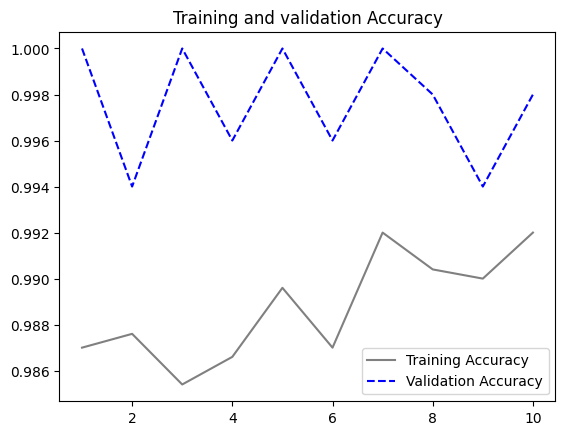

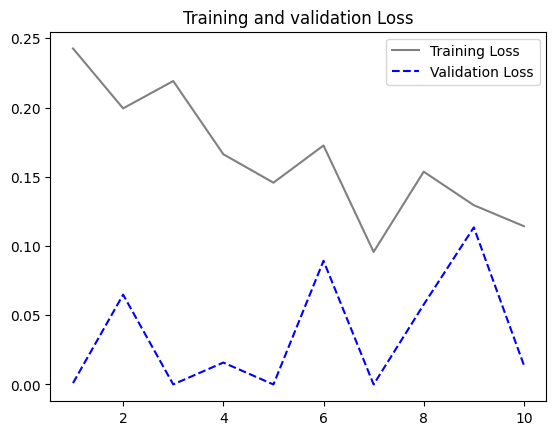

In [106]:
acc = FineTuned_VGG_Model_2.history["accuracy"]
val_acc = FineTuned_VGG_Model_2.history["val_accuracy"]

loss = FineTuned_VGG_Model_2.history["loss"]
val_loss = FineTuned_VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [107]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.keras")
FineTuned_VGG_Model_2_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.3f}")

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb6c2e8790>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 12s 706ms/step - loss: 7.8199e-09 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


<font size="4.5"><b> VGG - Model 3 (5000 Training Samples) </b></font>

In [108]:
conv_base= keras.applications.vgg16.VGG16(
           weights="imagenet",
           include_top=False)

conv_base.trainable = False


In [109]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [110]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [112]:
# Data Augmentation
data_augmentation_4 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_4(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model3.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_3 = model.fit(
              train_dataset,
              epochs= 10,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abb4c4d2950>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 10.0518 - accuracy: 0.9164WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abbcc46dd80> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbcc46dd80>. Note that functions defined in certain environments, like the interactive Python shell

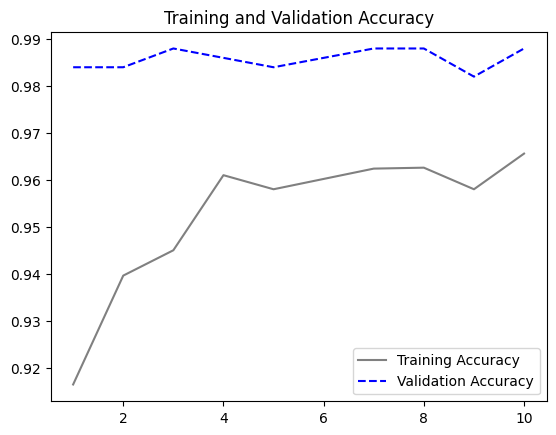

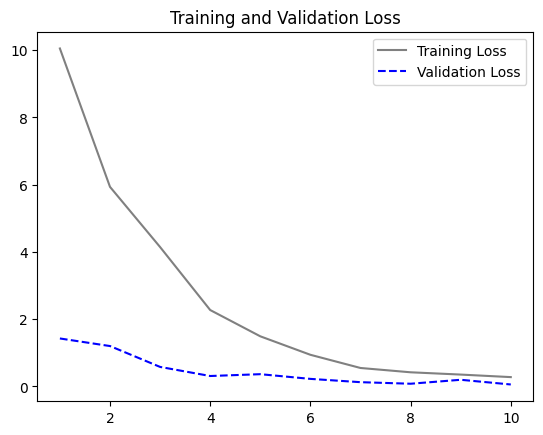

In [113]:
acc = VGG_Model_3.history["accuracy"]
val_acc = VGG_Model_3.history["val_accuracy"]

loss = VGG_Model_3.history["loss"]
val_loss = VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [114]:
best_model = keras.models.load_model("vgg_model3.keras")
VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {VGG_Model_3_Results[1]:.3f}")

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abbac18fc70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 11s 689ms/step - loss: 0.0867 - accuracy: 0.9880
Loss: 0.087
Accuracy: 0.988


<font size="4.5"><b> Fine Tunning VGG_Model_3 (Training Samples - 5000)</b></font>

To make VGG_Model3 perform even better, we've made a strategic move by freezing the first four layers. This approach serves a crucial purpose: it prevents the model from getting too fixated on the data, letting it focus solely on picking up the unique details that matter for our specific classification task.

As a result, we've set things up so that the pre-trained layers remain as they are, with the first four layers locked in place while the rest of the model continues to learn. These fine-tunings are pivotal in boosting the model's effectiveness, especially when we're working with a training dataset of 5000 samples.

In [115]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [116]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model3.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_3 = model.fit(
                        train_dataset,
                        epochs=10,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7abbac18eef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - ETA: 0s - loss: 0.1903 - accuracy: 0.9696WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7abb4c7ad900> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb4c7ad900>. Note that functions defined in certain environments, like the interactive Python shell,

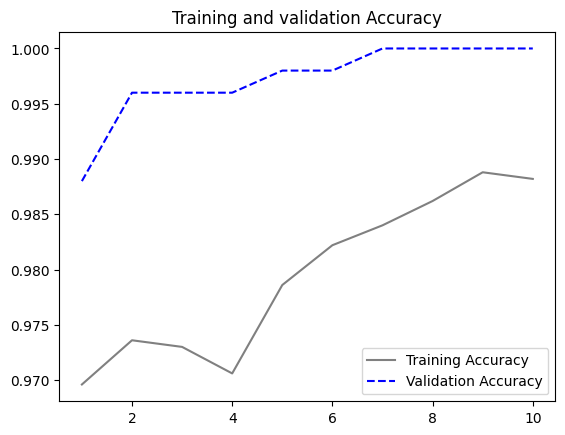

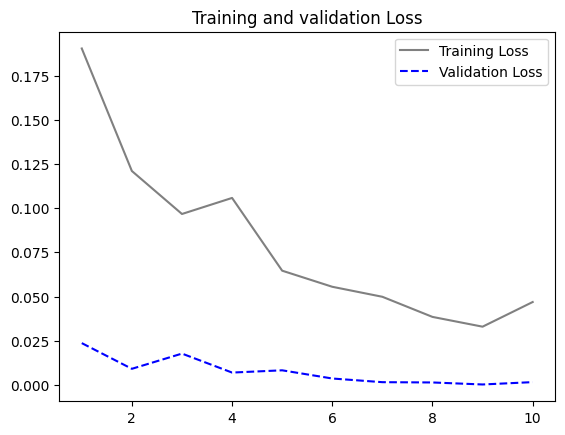

In [117]:
acc = FineTuned_VGG_Model_3.history["accuracy"]
val_acc = FineTuned_VGG_Model_3.history["val_accuracy"]

loss = FineTuned_VGG_Model_3.history["loss"]
val_loss = FineTuned_VGG_Model_3.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [118]:
best_model = keras.models.load_model("fine_tuning_vgg_model3.keras")
FineTuned_VGG_Model_3_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_3_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_3_Results[1]:.3f}")

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7abb8c762c20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 11s 693ms/step - loss: 0.0046 - accuracy: 0.9980
Loss: 0.005
Accuracy: 0.998


After developing a total of 15 models, including two fine-tuned versions of the initial ones, we're ready to conduct a comparative analysis to identify the top-performing models in two distinct categories: Scratch Models and Pre-Trained Models. Our immediate focus is on evaluating the best model created from scratch. This assessment involves a thorough examination of the loss and accuracy metrics across the 10 models, which were constructed using four different training sample sizes. The primary goal is to determine the most effective training sample size for the task of classifying cats and dogs.



In [120]:
# Scratch Models
Model_1 = (0.701, 0.638)
Model_2 = (0.600, 0.698)
Model_3 = (0.573,0.704)
Model_4 = (0.643, 0.678)
Model_5 =(0.469, 0.776)
Model_6 =(0.608, 0.680)
Model_7 =(0.510, 0.824)
Model_8 =(0.406, 0.828)
Model_9 =(0.439, 0.820)
Model_10 =(0.234, 0.908)

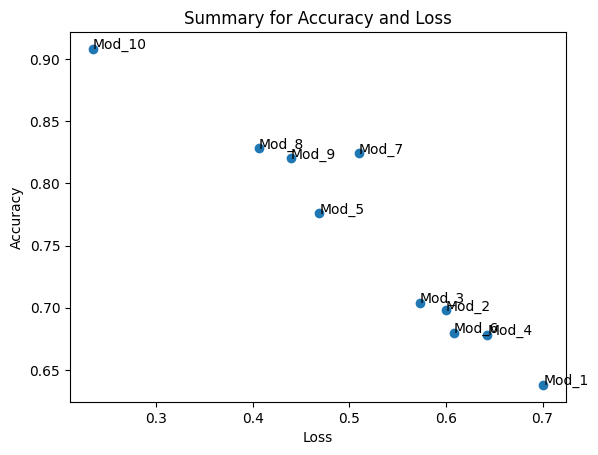

In [121]:
Models_4 = ("Mod_1","Mod_2","Mod_3","Mod_4","Mod_5","Mod_6","Mod_7","Mod_8","Mod_9","Mod_10")
Loss_4 = (Model_1[0],Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0],Model_10[0])
Accuracy_4 = (Model_1[1],Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1],Model_10[1])

fig, ax = plt.subplots()
ax.scatter(Loss_4,Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i],Accuracy_4[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Among the scratch models, Model_10 stands out as the highest-performing model. Trained with a substantial dataset of 5000 samples, it delivered an impressive 90.8% accuracy and a minimal loss of 23.4% on the test set. Model_10 was structured with a five-layer architecture, featuring filters ranging from 32 to 512. The model was further enhanced with a max-pooling operation and a dropout rate of 0.5. Additionally, the utilization of augmented images during training significantly contributed to its exceptional performance.

Following the development of our scratch models, we proceeded to construct five models using the pre-trained VGG16 network. The initial three models were trained with a sample size of 1000 and employed the RMSprop optimizer, while the subsequent two models utilized a larger sample size of 5000 and the Adam optimizer.

Here's a breakdown of the VGG models along with their key attributes:

VGG 1: Filters from 32 to 256 in 5 Input Layers<br>
VGG 2: Filters from 32 to 256 in 5 Input Layers, Augmented Images, and Dropout Rate of 0.5<br>
VGG 3: Filters from 32 to 512 in 6 Input Layers, Augmented Images, and Dropout Rate of 0.5<br>
VGG 4: VGG - Model 3 (Trained with 5000 Samples)<br>
VGG 5: Fine-Tuning VGG_Model_3 (Training Samples - 5000<br>

In [122]:
# Pre-Trained Models
VGG_Model_1 = (0.00, 100)
VGG_Model_2 = (2.8, 99.6)
FineTuned_VGG_Model_2 = (0.00, 100)
VGG_Model_3 = (8.7, 98.8)
FineTuned_VGG_Model_3 = (0.50, 99.8)

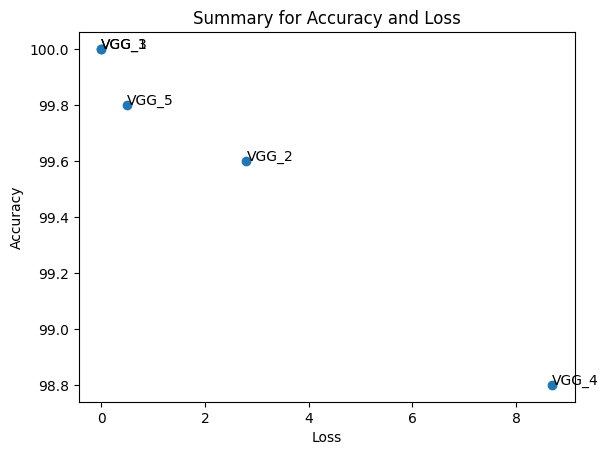

In [123]:
Models_5 = ("VGG_1","VGG_2","VGG_3","VGG_4","VGG_5")
Loss_5 = (VGG_Model_1[0],VGG_Model_2[0],FineTuned_VGG_Model_2[0],VGG_Model_3[0],FineTuned_VGG_Model_3[0])
Accuracy_5 = (VGG_Model_1[1],VGG_Model_2[1],FineTuned_VGG_Model_2[1],VGG_Model_3[1],FineTuned_VGG_Model_3[1])

fig, ax = plt.subplots()
ax.scatter(Loss_5,Accuracy_5)
for i, txt in enumerate(Models_5):
    ax.annotate(txt, (Loss_5[i],Accuracy_5[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

In the realm of pre-trained models, Model_5 and FineTuned_VGG_Model_3 stood out as the top performers, achieving a remarkable 100% accuracy with negligible 0.00% loss. These models were developed using training samples of 2000 and 5000, optimized with the Adam optimizer using a low learning rate of 0.000001.

**Conclusion:**
The analysis highlights the profound impact of training data volume and model architecture on test accuracy, particularly when a model is directly trained from scratch. Incorporating contemporary architectural elements like residual connections, batch normalization, and depthwise separable convolutions, along with data augmentation and dropout techniques, led to substantial gains in test accuracy. Notably, expanding the training dataset from 1000 to 3000 samples resulted in significant improvements. Further increasing the dataset to 6000 samples brought the scratch model's test accuracy to a level comparable to that of pretrained models. This underscores the challenge of overfitting, where a small dataset limits a model's ability to generalize effectively.

Conversely, in the case of pretrained models, test accuracy is less influenced by training sample size due to the nature of the model. The size and complexity of the original pretrained model, like VGG16, contribute to its high baseline accuracy. Techniques such as data augmentation and fine-tuning, which often boost performance in simpler models, don't have a significant impact on the already high accuracy of pretrained models.

**Recommendations:**
For scratch models, the significant boost in test accuracy from 69.6% to 88.4% with an increase in the training data from 1000 to 3000 samples is a noteworthy observation. With 3000 training samples, the incorporation of modern architectural elements, data augmentation, and dropout techniques resulted in test accuracy close to 83.2%. Furthermore, with a 5000-sample training dataset, the test accuracy reached 88%. Therefore, Model_10 from the scratch models is the recommended choice due to its superior accuracy.

It's essential to acknowledge that pretrained models are highly effective in specific contexts, especially when the model's original training aligns with the problem domain. The high baseline accuracy of the pretrained VGG16 model makes it an excellent choice for tasks like image classification. However, it's important to note that the suitability of a pretrained model depends on the similarity between the original training data and the data used in the target task. In some cases, fine-tuning may be necessary to adapt the pretrained model to the specific task.

This analysis provides valuable insights into the intricate interplay between training data, model architecture, and pretrained models, offering guidance on model selection and the need for additional modifications in different scenarios.




